In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2      
from PIL import Image
import os

In [2]:
data = pd.read_csv("../data/train_set.csv")
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
0,ID_1,18281.541667,18432.0,9409.650391,0.514708,0.011300,0.045369,2.803803,0.356658,1.803803,...,382.968383,2214.0,1.0,136.625113,0.061710,0.0,28.154838,4.174959,0.061710,0
1,ID_2,20010.083333,20100.0,8303.049072,0.417707,0.014959,0.080294,2.338398,0.429532,1.338398,...,452.986164,2548.5,1.0,232.564022,0.090548,0.0,27.934229,3.931950,0.090548,1
2,ID_3,27260.125000,27437.0,12189.649414,0.447160,0.011428,0.046402,2.782842,0.359345,1.782842,...,419.781765,3400.0,1.0,233.593529,0.068704,0.0,27.904807,4.085035,0.068704,1
3,ID_4,41938.125000,42138.0,17866.433594,0.426019,0.009908,0.034878,3.060655,0.326727,2.060655,...,439.023968,5424.0,1.0,427.429572,0.078803,0.0,27.870588,4.011726,0.078803,0
4,ID_5,41274.125000,41439.0,14315.041992,0.346828,0.013596,0.065680,2.478506,0.403469,1.478506,...,485.209184,5096.0,1.0,726.731554,0.142608,0.0,28.846909,3.571352,0.142608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,ID_311,46787.916667,47002.0,18052.070312,0.385828,0.010883,0.042086,2.874885,0.347840,1.874885,...,466.276055,6064.0,1.0,585.547823,0.096561,0.0,28.787507,3.894684,0.096561,0
311,ID_312,8420.354167,8493.0,4292.039795,0.510004,0.016911,0.101797,2.145061,0.466555,1.145061,...,383.044821,987.0,1.0,69.155790,0.070369,0.0,29.625473,4.098452,0.070369,1
312,ID_313,37262.750000,37407.0,13950.793945,0.374390,0.012759,0.057837,2.585819,0.386725,1.585819,...,469.005263,4940.0,1.0,505.566802,0.102341,0.0,26.865256,3.815115,0.102341,0
313,ID_314,25081.833333,25251.0,11689.275391,0.466045,0.011197,0.044546,2.820962,0.354489,1.820962,...,403.597826,2944.0,1.0,215.172554,0.073089,0.0,29.180584,4.055504,0.073089,1


In [3]:
# view basic info
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Columns: 3240 entries, ID to CLASS
dtypes: float64(3238), int64(1), object(1)
memory usage: 7.8+ MB
None


In [4]:
# check first few rows
print(data.head(3))

     ID     Feature_1  Feature_2     Feature_3  Feature_4  Feature_5  \
0  ID_1  18281.541667    18432.0   9409.650391   0.514708   0.011300   
1  ID_2  20010.083333    20100.0   8303.049072   0.417707   0.014959   
2  ID_3  27260.125000    27437.0  12189.649414   0.447160   0.011428   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_3230  \
0   0.045369   2.803803   0.356658   1.803803  ...    382.968383   
1   0.080294   2.338398   0.429532   1.338398  ...    452.986164   
2   0.046402   2.782842   0.359345   1.782842  ...    419.781765   

   Feature_3231  Feature_3232  Feature_3233  Feature_3234  Feature_3235  \
0        2214.0           1.0    136.625113      0.061710           0.0   
1        2548.5           1.0    232.564022      0.090548           0.0   
2        3400.0           1.0    233.593529      0.068704           0.0   

   Feature_3236  Feature_3237  Feature_3238  CLASS  
0     28.154838      4.174959      0.061710      0  
1     27.934229      3.931950  

In [5]:
data.columns

Index(['ID', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       ...
       'Feature_3230', 'Feature_3231', 'Feature_3232', 'Feature_3233',
       'Feature_3234', 'Feature_3235', 'Feature_3236', 'Feature_3237',
       'Feature_3238', 'CLASS'],
      dtype='object', length=3240)

In [6]:
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [7]:
data.dtypes.value_counts()

float64    3238
object        1
int64         1
Name: count, dtype: int64

In [8]:
data.select_dtypes(include=['object']).columns[0], data.select_dtypes(include=['int']).columns[0]

('ID', 'CLASS')

All the features are float64

In [9]:
# summary statistics for numeric columns
print(data.describe())

           Feature_1      Feature_2     Feature_3   Feature_4   Feature_5  \
count     315.000000     315.000000    315.000000  315.000000  315.000000   
mean    36401.611839   36558.978836  13421.797935    0.399783    0.013326   
std     23979.228698   24006.711019   5229.346354    0.064272    0.002885   
min      4601.166667    4646.000000   2420.351481    0.137726    0.008904   
25%     23287.562500   23443.500000  10245.704590    0.357646    0.011459   
50%     34818.166667   35028.000000  13894.792969    0.394076    0.012477   
75%     45575.708333   45750.000000  16633.839844    0.434799    0.014242   
max    332120.750000  332379.000000  45741.601562    0.643473    0.025418   

        Feature_6   Feature_7   Feature_8   Feature_9    Feature_10  ...  \
count  315.000000  315.000000  315.000000  315.000000    315.000000  ...   
mean     0.066770    2.572654    0.395949    1.572654    355.140036  ...   
std      0.034442    0.305500    0.054492    0.305500   5460.014132  ...   
mi

In [10]:
data.isnull().sum().sum()  # total missing values in dataset


2668

In [11]:
data.isnull().any(axis=1).sum() # number of rows with missing values

116

In [12]:
print(data['CLASS'].value_counts())


CLASS
0    191
1    124
Name: count, dtype: int64


In [13]:
data.isnull().sum()[data.isnull().sum() > 0]

Feature_1712    116
Feature_1713    116
Feature_1714    116
Feature_1715    116
Feature_1716    116
Feature_1717    116
Feature_1718    116
Feature_1719    116
Feature_1720    116
Feature_1721    116
Feature_1722    116
Feature_1723    116
Feature_1724    116
Feature_1725    116
Feature_1726    116
Feature_1727    116
Feature_1728    116
Feature_1729    116
Feature_1730    116
Feature_1731    116
Feature_1732    116
Feature_1733    116
Feature_1734    116
dtype: int64

In [28]:
data_drop_id = data.drop(['ID'], axis=1)

In [29]:
np.isinf(data_drop_id).sum().sum()

4

In [30]:
data_drop_id.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
# check each colum with missing values
missing_per_feature = data_drop_id.isnull().sum()
print(missing_per_feature[missing_per_feature > 0].sort_values(ascending=False))


Feature_1722    116
Feature_1723    116
Feature_1733    116
Feature_1732    116
Feature_1731    116
Feature_1730    116
Feature_1729    116
Feature_1728    116
Feature_1727    116
Feature_1726    116
Feature_1725    116
Feature_1724    116
Feature_1734    116
Feature_1721    116
Feature_1720    116
Feature_1719    116
Feature_1718    116
Feature_1717    116
Feature_1716    116
Feature_1715    116
Feature_1714    116
Feature_1713    116
Feature_1712    116
Feature_90        2
Feature_72        2
dtype: int64


In [32]:
# Impute with mean because there are low number of inf values
data_drop_id[['Feature_90', 'Feature_72']] = data_drop_id[['Feature_90', 'Feature_72']].fillna(data_drop_id[['Feature_90', 'Feature_72']].mean())

In [33]:
# check again after filling missing columns with mean values
missing_per_feature = data_drop_id.isnull().sum()
print(missing_per_feature[missing_per_feature > 0].sort_values(ascending=False))


Feature_1712    116
Feature_1724    116
Feature_1733    116
Feature_1732    116
Feature_1731    116
Feature_1730    116
Feature_1729    116
Feature_1728    116
Feature_1727    116
Feature_1726    116
Feature_1725    116
Feature_1723    116
Feature_1713    116
Feature_1722    116
Feature_1721    116
Feature_1720    116
Feature_1719    116
Feature_1718    116
Feature_1717    116
Feature_1716    116
Feature_1715    116
Feature_1714    116
Feature_1734    116
dtype: int64


In [34]:
data_drop_id["Feature_1712"].isnull().sum()

116

In [35]:
cols_to_drop = missing_per_feature[missing_per_feature > 0].index # get column names of data with missing values

In [36]:
missing_data_cols = data_drop_id[cols_to_drop]
missing_data_cols

,Feature_1712,Feature_1713,Feature_1714,Feature_1715,Feature_1716,Feature_1717,Feature_1718,Feature_1719,Feature_1720,Feature_1721,...,Feature_1725,Feature_1726,Feature_1727,Feature_1728,Feature_1729,Feature_1730,Feature_1731,Feature_1732,Feature_1733,Feature_1734
0,1.004449,0.004429,14.892446,219.784956,1.0,1.0,1.0,1.0,2.0,1.0,...,0.000000,0.004449,0.066256,0.000000,0.041160,0.991142,-18268.0,1.0,-18268.0,1.0
1,1.138075,0.119011,2.098242,2.402618,1.0,1.0,1.0,2.0,2.0,1.0,...,0.238021,0.138075,0.303125,0.000000,0.579176,0.761979,-13494.0,1.0,-13494.0,1.0
2,1.389000,0.237679,0.455362,-1.792646,1.0,1.0,1.0,2.0,2.0,1.0,...,0.475358,0.389000,0.350989,0.333333,0.964151,0.524642,-6091.0,1.0,-6091.0,1.0
3,1.351678,0.228001,0.621253,-1.614045,1.0,1.0,1.0,2.0,2.0,1.0,...,0.456001,0.351678,0.353260,0.333333,0.935558,0.543999,-12500.0,1.0,-12500.0,1.0
4,1.164893,0.137703,1.806098,1.261991,1.0,1.0,1.0,2.0,2.0,1.0,...,0.275407,0.164893,0.318556,0.000000,0.645888,0.724593,-27773.0,1.0,-27773.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,1.005158,0.005106,50.570340,4221.544983,1.0,1.0,1.0,1.0,2.0,1.0,...,0.000000,0.005158,0.055191,0.000000,0.041910,0.989788,-8404.0,1.0,-8404.0,1.0
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Find rows where all these columns are missing
rows_all_missing = missing_data_cols[missing_data_cols.isnull().all(axis=1)]

print(f"Number of rows with missing values in *all* these columns: {rows_all_missing.shape[0]}")

# Compare if this equals 116 (the number of missing values per column)


Number of rows with missing values in *all* these columns: 116


In [38]:
data_dropped_cols = data_drop_id.drop(columns=cols_to_drop) #drop columns with missing values


In [39]:
data_dropped_cols.isnull().sum().sum() # cols with zero missing data

0

In [40]:
print(data_dropped_cols['CLASS'].value_counts())


CLASS
0    191
1    124
Name: count, dtype: int64


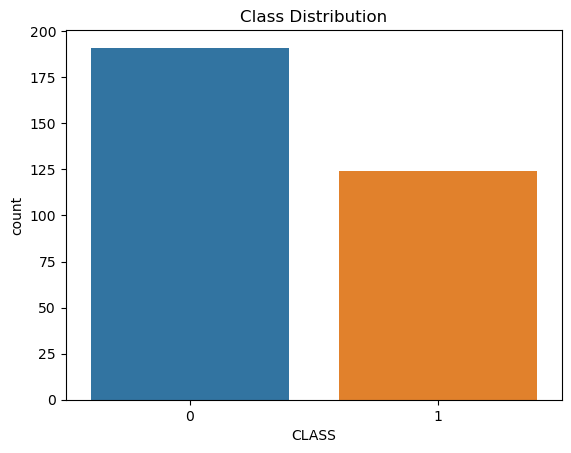

In [41]:
sns.countplot(x = "CLASS", data = data) # class distribution in original data
plt.title('Class Distribution')
plt.show()


In [42]:
# separate data into features (X) and targets (y)
X = data_dropped_cols.drop(['CLASS'], axis=1)
y = data_dropped_cols['CLASS']


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, confusion_matrix

# Assuming:
# X_scaled = your scaled feature matrix (training data)
# y = your target vector (training labels)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_scaled, y)

# (Optional) Predict on training data to check performance
y_pred = model.predict(X_scaled)
y_proba = model.predict_proba(X_scaled)[:, 1]  # Probability for positive class

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, y_proba)
recall = recall_score(y, y_pred)  # Sensitivity / True Positive Rate
f1 = f1_score(y, y_pred)
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn + fp)

print(f"Training Accuracy: {accuracy:.4f}")
print(f"Training AUROC: {roc_auc:.4f}")
print(f"Training Sensitivity (Recall): {recall:.4f}")
print(f"Training Specificity: {specificity:.4f}")
print(f"Training F1-score: {f1:.4f}")


Training Accuracy: 1.0000
Training AUROC: 1.0000
Training Sensitivity (Recall): 1.0000
Training Specificity: 1.0000
Training F1-score: 1.0000


In [45]:
test_set = pd.read_csv("../data/test_set.csv")

In [46]:
test_set = test_set.drop(['ID'], axis=1)

In [47]:
np.isinf(test_set).sum().sum()


0

In [48]:
# check each colum with missing values
missing_per_column_test = test_set.isnull().sum()
print(missing_per_column_test[missing_per_column_test > 0].sort_values(ascending=False))

Feature_1712    49
Feature_1724    49
Feature_1733    49
Feature_1732    49
Feature_1731    49
Feature_1730    49
Feature_1729    49
Feature_1728    49
Feature_1727    49
Feature_1726    49
Feature_1725    49
Feature_1723    49
Feature_1713    49
Feature_1722    49
Feature_1721    49
Feature_1720    49
Feature_1719    49
Feature_1718    49
Feature_1717    49
Feature_1716    49
Feature_1715    49
Feature_1714    49
Feature_1734    49
dtype: int64


In [49]:
cols_to_drop_test = missing_per_column_test[missing_per_column_test > 0].index 
 # get column names of data with missing values
 
cols_to_drop_test

Index(['Feature_1712', 'Feature_1713', 'Feature_1714', 'Feature_1715',
       'Feature_1716', 'Feature_1717', 'Feature_1718', 'Feature_1719',
       'Feature_1720', 'Feature_1721', 'Feature_1722', 'Feature_1723',
       'Feature_1724', 'Feature_1725', 'Feature_1726', 'Feature_1727',
       'Feature_1728', 'Feature_1729', 'Feature_1730', 'Feature_1731',
       'Feature_1732', 'Feature_1733', 'Feature_1734'],
      dtype='object')

In [50]:
data_dropped_cols_test = test_set.drop(columns=cols_to_drop_test) #drop columns with missing values
data_dropped_cols_test

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
0,15385.458333,15472.5,6357.250488,0.413973,0.017592,0.111930,2.108410,0.478124,1.108410,3.165713,...,444.535442,1934.5,1.0,170.507074,0.086972,0.0,29.952211,3.963248,0.086972,1
1,19539.729167,19651.5,8168.700928,0.417849,0.014973,0.079801,2.326599,0.430171,1.326599,11.257600,...,450.784676,2480.5,1.0,234.801218,0.094857,0.0,31.625858,3.942665,0.094857,0
2,34867.125000,35049.0,14382.916992,0.412507,0.011404,0.046211,2.786669,0.358851,1.786669,100.627321,...,439.605257,4299.0,1.0,449.882066,0.104648,0.0,28.805248,3.788374,0.104648,0
3,46112.083333,46290.0,16512.630859,0.358098,0.012261,0.053411,2.655353,0.376598,1.655353,8.614636,...,477.467085,5742.0,1.0,706.494949,0.123040,0.0,27.601655,3.675757,0.123040,0
4,37229.000000,37383.0,12981.727539,0.348699,0.014201,0.071650,2.407654,0.415342,1.407654,10.869511,...,488.478334,4754.0,1.0,650.593185,0.136852,0.0,28.207070,3.620278,0.136852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41560.708333,41748.0,16007.148438,0.385151,0.011578,0.047630,2.758722,0.362487,1.758722,26.477994,...,469.095401,5262.0,1.0,563.409350,0.107071,0.0,30.470757,3.855033,0.107071,0
96,47127.500000,47295.0,15617.785156,0.331394,0.013623,0.065939,2.475250,0.404000,1.475250,23.197246,...,499.306449,5939.0,1.0,863.832800,0.145451,0.0,28.104362,3.582167,0.145451,1
97,44099.625000,44304.0,17311.683594,0.392559,0.010923,0.042394,2.867908,0.348686,1.867908,26.133394,...,450.682256,5602.0,1.0,555.745805,0.099205,0.0,27.051511,3.819057,0.099205,1
98,29193.833333,29343.0,11772.097656,0.403239,0.012895,0.059084,2.567491,0.389485,1.567491,16.133637,...,451.920128,3756.0,1.0,466.173056,0.124114,0.0,28.454736,3.617704,0.124114,0


In [51]:
data_dropped_cols_test.isnull().sum().sum() # cols with zero missing data

0

In [52]:
# separate data into features (X) and targets (y)
X_test = data_dropped_cols_test.drop(['CLASS'], axis=1)
y_test = data_dropped_cols_test['CLASS']


In [53]:
X_test_scaled = scaler.transform(X_test)

In [57]:
# (Optional) Predict on training data to check performance
y_pred_test = model.predict(X_test_scaled)
y_proba_test = model.predict_proba(X_test_scaled)[:, 1]  # Probability for positive class

# Calculate metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_proba_test)
recall_test = recall_score(y_test, y_pred_test)  # Sensitivity / True Positive Rate
f1_test = f1_score(y_test, y_pred_test)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()
specificity_test = tn_test / (tn_test + fp_test)

print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing AUROC: {roc_auc_test:.4f}")
print(f"Testing Sensitivity (Recall): {recall_test:.4f}")
print(f"Testing Specificity: {specificity_test:.4f}")
print(f"Testing F1-score: {f1_test:.4f}")

Testing Accuracy: 0.5800
Testing AUROC: 0.6486
Testing Sensitivity (Recall): 0.4286
Testing Specificity: 0.6897
Testing F1-score: 0.4615
